En el siguiente notebook, se va a trabajar con los datos con el fin de poder sacar el máximo provecho de los datos de una forma más ordenada, detectando los valores faltantes, los datos duplicados y atípicos para que no afecte de manera negativa al análisis. 


In [2]:
# Se importan las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [39]:
df_ingresos = pd.read_excel('../Data/Internet.xlsx', sheet_name='Ingresos ')


In [42]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2023,1,1.041350e+08,Ene-Mar 2023


In [41]:
# Se corrige el valor de la quinta fila, el cual era de año 2033
if 'Año' in df_ingresos.columns:
    df_ingresos['Año'] = df_ingresos['Año'].replace(2033, 2023)


In [48]:
# Se realiza una búsqueda de los valores faltantes
valores_faltantes = df_ingresos.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Series([], dtype: int64)

In [49]:
# Verificación de registros duplicados
duplicados = df_ingresos.duplicated().sum()
duplicados

0

Mo se detectan valores duplicados ni faltantes, por lo que no es necesario realizar trnasformaciones o eliminar datos.

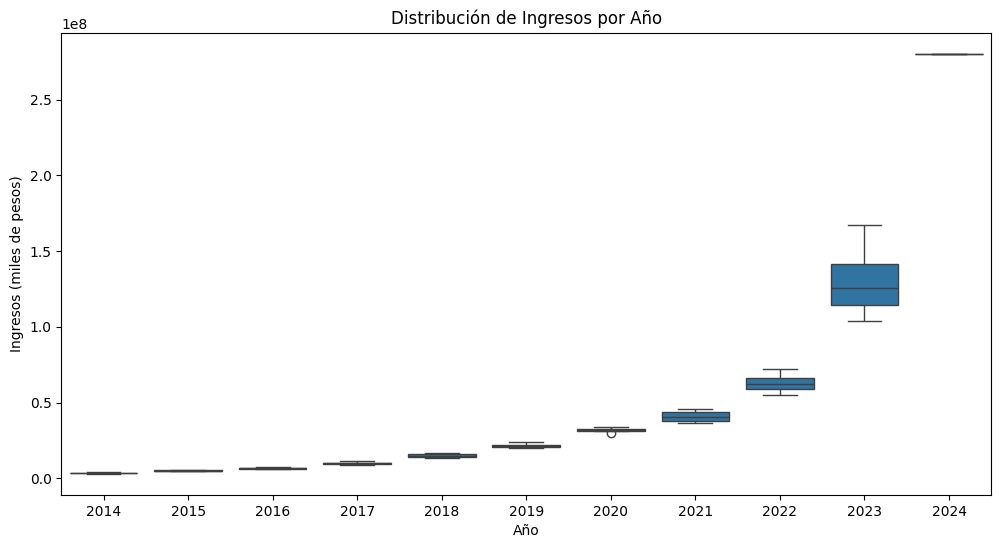

In [44]:
# Boxplot de Ingresos por Año
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Distribución de Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()




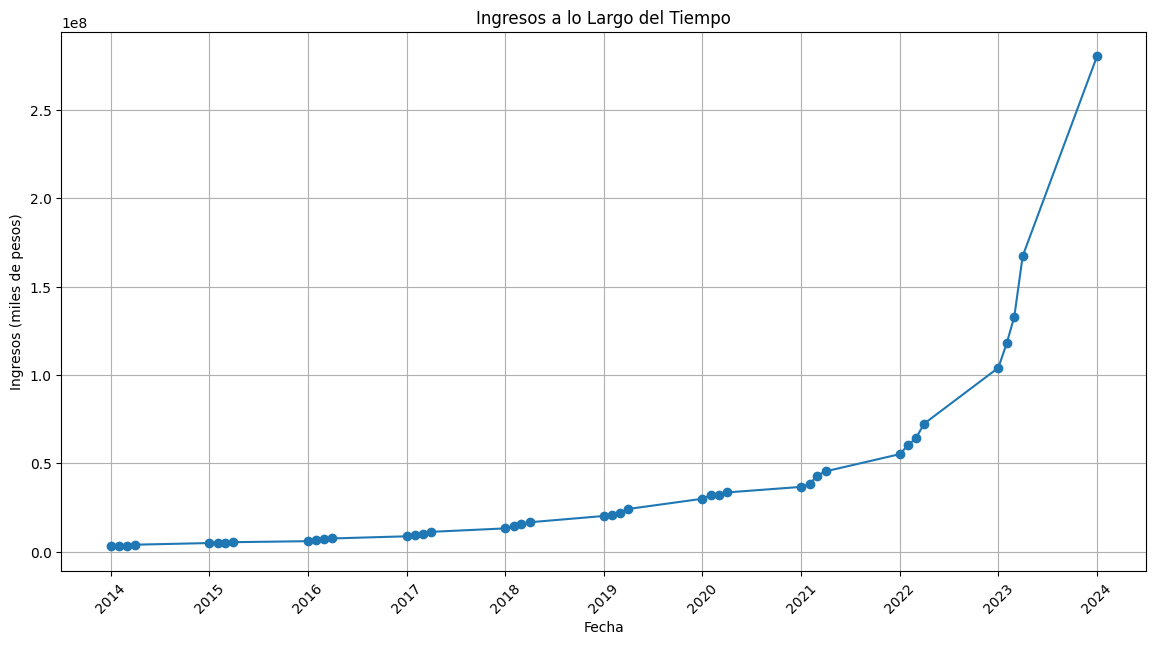

In [45]:
# Visualización de Ingresos a lo Largo del Tiempo

df_ingresos['Fecha'] = pd.to_datetime(df_ingresos['Año'].astype(str) + df_ingresos['Trimestre'].astype(str) + '1', format='%Y%m%d')
plt.figure(figsize=(14, 7))
plt.plot(df_ingresos['Fecha'], df_ingresos['Ingresos (miles de pesos)'], marker='o', linestyle='-')
plt.title('Ingresos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Se puede ver un fuerte aumento en los ingresos en los últimos tiempos. Esto se podría relaacionar con el aumento de los teletrabajos postpandemia, en donde es obligatorio contar con conexiones de internet por cada hogar, posiblemente también por la popularización de plataformas de streming, como Netflix, que están en auge y requieren una buena conexión a internet.

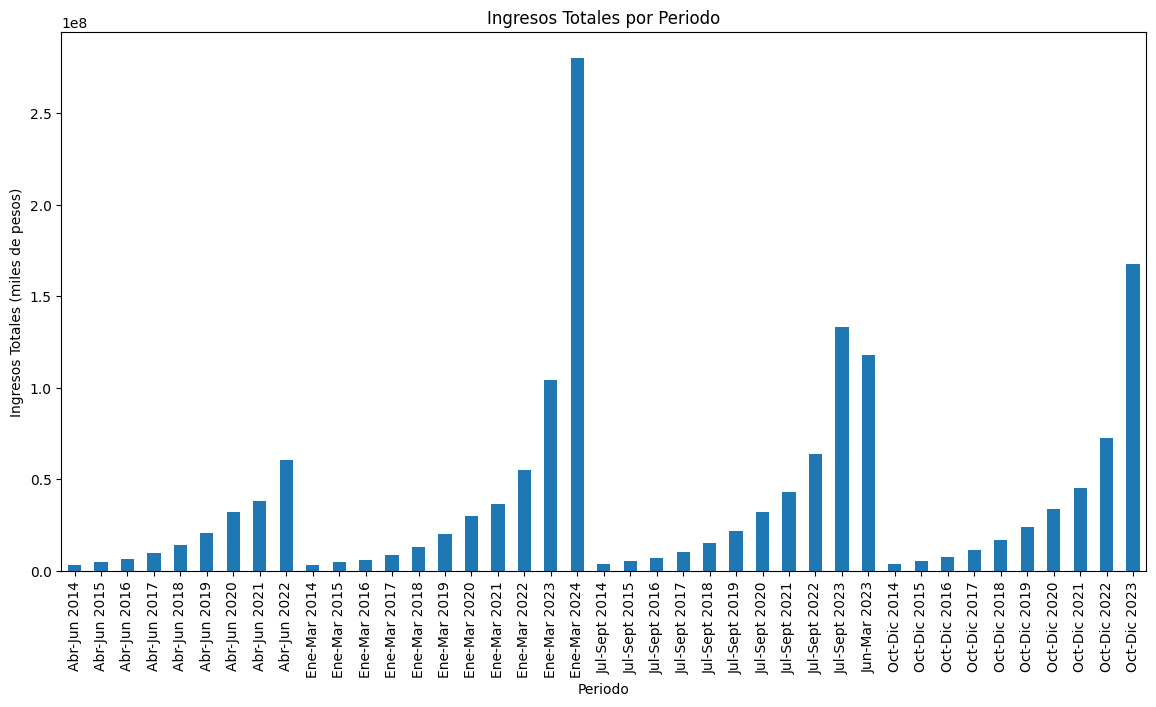

In [47]:
# Comparación entre los distintos ingresos agrupados por períodos en diferentes años

plt.figure(figsize=(14, 7))
df_ingresos.groupby('Periodo')['Ingresos (miles de pesos)'].sum().plot(kind='bar')
plt.xlabel('Periodo')
plt.ylabel('Ingresos Totales (miles de pesos)')
plt.title('Ingresos Totales por Periodo')
plt.show()


Se puede llegar a la conclusión de que en los últimos años en todos los trimestres hubo aumentos, pero que en los dos primeros trimestres del año los ingresos son menores, por lo que se podría hacer un enfoque en estos períodos, campañas referidas al comienzo de los ciclos lectivos tanto en el colegio como en la universidad.